In [72]:
import sys
!{sys.executable} -m pip install streamlit

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import streamlit as st

import warnings
warnings.filterwarnings("ignore")

In [74]:
data = pd.read_csv("C:/Users/User/Desktop/AmdariProjs/Project_RFM/data/bank_data_C.csv")
data.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


### Functions

In [75]:
# check the data
def check_data(data):
    '''
    shows different information about the dataset
    ''' 
    print(data.shape)
    print(data.dtypes)
    print(data.info())
    print(data.nunique())
    print(data.duplicated().sum())
    print(data.isnull().sum().sum())
    (data.isnull().sum()/(len(data)))*100
    return data

# clean customer DOBs


### Data Preprocessing

In [76]:
#check data
check_data(data)


(1041614, 9)
TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [77]:
data.describe(include = "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


## Data Cleaning

In [78]:
# check count of null values in data
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [79]:
# convert customer DOB and Transaction date to datetime object
data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"], errors = 'coerce')
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])

In [80]:
sorted(data["TransactionDate"].unique())

[numpy.datetime64('2016-01-08T00:00:00.000000000'),
 numpy.datetime64('2016-01-09T00:00:00.000000000'),
 numpy.datetime64('2016-02-08T00:00:00.000000000'),
 numpy.datetime64('2016-02-09T00:00:00.000000000'),
 numpy.datetime64('2016-03-08T00:00:00.000000000'),
 numpy.datetime64('2016-03-09T00:00:00.000000000'),
 numpy.datetime64('2016-04-08T00:00:00.000000000'),
 numpy.datetime64('2016-04-09T00:00:00.000000000'),
 numpy.datetime64('2016-05-08T00:00:00.000000000'),
 numpy.datetime64('2016-05-09T00:00:00.000000000'),
 numpy.datetime64('2016-06-08T00:00:00.000000000'),
 numpy.datetime64('2016-06-09T00:00:00.000000000'),
 numpy.datetime64('2016-07-08T00:00:00.000000000'),
 numpy.datetime64('2016-07-09T00:00:00.000000000'),
 numpy.datetime64('2016-08-08T00:00:00.000000000'),
 numpy.datetime64('2016-08-09T00:00:00.000000000'),
 numpy.datetime64('2016-08-13T00:00:00.000000000'),
 numpy.datetime64('2016-08-14T00:00:00.000000000'),
 numpy.datetime64('2016-08-15T00:00:00.000000000'),
 numpy.datet

## Observations
The data covers about 2.5 months of transactions, with the earliest transaction occuring on 01/08/2016, and the last transaction occuring in October. While there are daily transactions for most of August and September, the data does not show a high level of activity in October, as well as the latter part of September. 

In [81]:
# enhancement to transaction date - create extra date column
data['TransactionDateOnly'] = pd.to_datetime(data['TransactionDate']).dt.date

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
 9   TransactionDateOnly      1041614 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 79.5+ MB


In [83]:
observed_dates = set(data['TransactionDateOnly'])
sorted(observed_dates)

[datetime.date(2016, 1, 8),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 2, 8),
 datetime.date(2016, 2, 9),
 datetime.date(2016, 3, 8),
 datetime.date(2016, 3, 9),
 datetime.date(2016, 4, 8),
 datetime.date(2016, 4, 9),
 datetime.date(2016, 5, 8),
 datetime.date(2016, 5, 9),
 datetime.date(2016, 6, 8),
 datetime.date(2016, 6, 9),
 datetime.date(2016, 7, 8),
 datetime.date(2016, 7, 9),
 datetime.date(2016, 8, 8),
 datetime.date(2016, 8, 9),
 datetime.date(2016, 8, 13),
 datetime.date(2016, 8, 14),
 datetime.date(2016, 8, 15),
 datetime.date(2016, 8, 16),
 datetime.date(2016, 8, 17),
 datetime.date(2016, 8, 18),
 datetime.date(2016, 8, 19),
 datetime.date(2016, 8, 20),
 datetime.date(2016, 8, 21),
 datetime.date(2016, 8, 22),
 datetime.date(2016, 8, 23),
 datetime.date(2016, 8, 24),
 datetime.date(2016, 8, 25),
 datetime.date(2016, 8, 26),
 datetime.date(2016, 8, 27),
 datetime.date(2016, 8, 28),
 datetime.date(2016, 8, 29),
 datetime.date(2016, 8, 30),
 datetime.date(2016, 8, 31),
 

In [84]:
# check missing dates in the data

# Create full date range from min to max
full_range = pd.date_range(start=min(observed_dates), end=max(observed_dates))

# Convert to set of date objects
expected_dates = set(full_range.date)

# Find missing dates
missing_dates = sorted(expected_dates - observed_dates)

print("Missing dates:", missing_dates)
print(f"Total missing dates: {len(missing_dates)}")

Missing dates: [datetime.date(2016, 1, 10), datetime.date(2016, 1, 11), datetime.date(2016, 1, 12), datetime.date(2016, 1, 13), datetime.date(2016, 1, 14), datetime.date(2016, 1, 15), datetime.date(2016, 1, 16), datetime.date(2016, 1, 17), datetime.date(2016, 1, 18), datetime.date(2016, 1, 19), datetime.date(2016, 1, 20), datetime.date(2016, 1, 21), datetime.date(2016, 1, 22), datetime.date(2016, 1, 23), datetime.date(2016, 1, 24), datetime.date(2016, 1, 25), datetime.date(2016, 1, 26), datetime.date(2016, 1, 27), datetime.date(2016, 1, 28), datetime.date(2016, 1, 29), datetime.date(2016, 1, 30), datetime.date(2016, 1, 31), datetime.date(2016, 2, 1), datetime.date(2016, 2, 2), datetime.date(2016, 2, 3), datetime.date(2016, 2, 4), datetime.date(2016, 2, 5), datetime.date(2016, 2, 6), datetime.date(2016, 2, 7), datetime.date(2016, 2, 10), datetime.date(2016, 2, 11), datetime.date(2016, 2, 12), datetime.date(2016, 2, 13), datetime.date(2016, 2, 14), datetime.date(2016, 2, 15), datetime.da

In [85]:
# create additional column for customer age
reference_date = pd.to_datetime("2016-10-21")
data['CustomerAge'] = ((reference_date - data['CustomerDOB']).dt.days // 365)

In [86]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateOnly,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016-02-08,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016-02-08,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016-02-08,19
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016-02-08,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016-02-08,28


In [87]:
data['CustomerAge'].describe()

count    1.041614e+06
mean     3.080329e+01
std      5.039762e+01
min     -5.900000e+01
25%      2.400000e+01
50%      2.700000e+01
75%      3.200000e+01
max      2.160000e+02
Name: CustomerAge, dtype: float64

In [88]:
# Drop unrealistic age records - retain only customers aged between 10 and 100
data = data[(data['CustomerAge'] >=10) & (data['CustomerAge'] <= 100)]

In [89]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateOnly,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016-02-08,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016-02-08,19
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016-02-08,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,2016-02-08,24
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,2016-02-08,34


In [90]:
data['CustomerAge'].describe()

count    880301.000000
mean         28.552561
std           5.165355
min          10.000000
25%          25.000000
50%          28.000000
75%          32.000000
max          41.000000
Name: CustomerAge, dtype: float64

In [91]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateOnly,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016-02-08,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016-02-08,19
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016-02-08,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,2016-02-08,24
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,2016-02-08,34


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880301 entries, 0 to 1041613
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            880301 non-null  object        
 1   CustomerID               880301 non-null  object        
 2   CustomerDOB              880301 non-null  datetime64[ns]
 3   CustGender               880301 non-null  object        
 4   CustLocation             880301 non-null  object        
 5   CustAccountBalance       880301 non-null  float64       
 6   TransactionDate          880301 non-null  datetime64[ns]
 7   TransactionTime          880301 non-null  int64         
 8   TransactionAmount (INR)  880301 non-null  float64       
 9   TransactionDateOnly      880301 non-null  object        
 10  CustomerAge              880301 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 80.6+ MB


In [93]:
# define customer age group buckets
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18–25', '26–35', '36–45', '46–55', '56–65', '65+']

data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=age_bins, labels=age_labels, right=False)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880301 entries, 0 to 1041613
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            880301 non-null  object        
 1   CustomerID               880301 non-null  object        
 2   CustomerDOB              880301 non-null  datetime64[ns]
 3   CustGender               880301 non-null  object        
 4   CustLocation             880301 non-null  object        
 5   CustAccountBalance       880301 non-null  float64       
 6   TransactionDate          880301 non-null  datetime64[ns]
 7   TransactionTime          880301 non-null  int64         
 8   TransactionAmount (INR)  880301 non-null  float64       
 9   TransactionDateOnly      880301 non-null  object        
 10  CustomerAge              880301 non-null  int64         
 11  AgeGroup                 880301 non-null  category      
dtypes: category(1),

In [95]:
# check types of gender in the data
data.CustGender.unique()

array(['F', 'M'], dtype=object)

## Exploratory Data Analysis (EDA) 

### Customer Gender Distribution

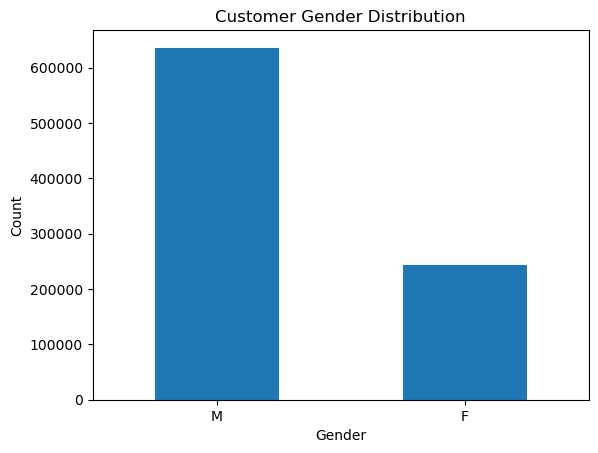

In [96]:
# plot gender split in data

data['CustGender'].value_counts().plot(kind = 'bar')
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

### Customer Age Distribution

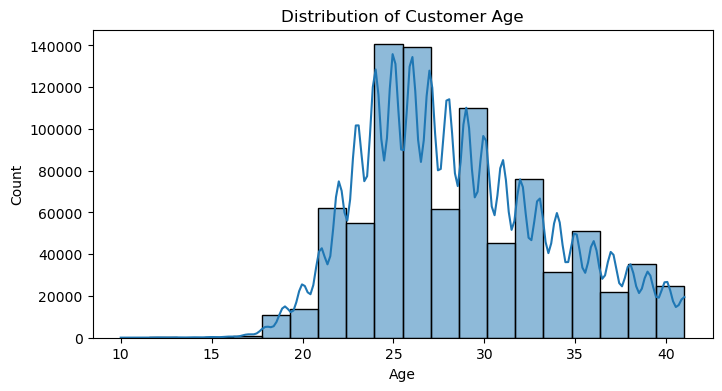

In [97]:
plt.figure(figsize=(8, 4))
sns.histplot(data['CustomerAge'].dropna(), bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

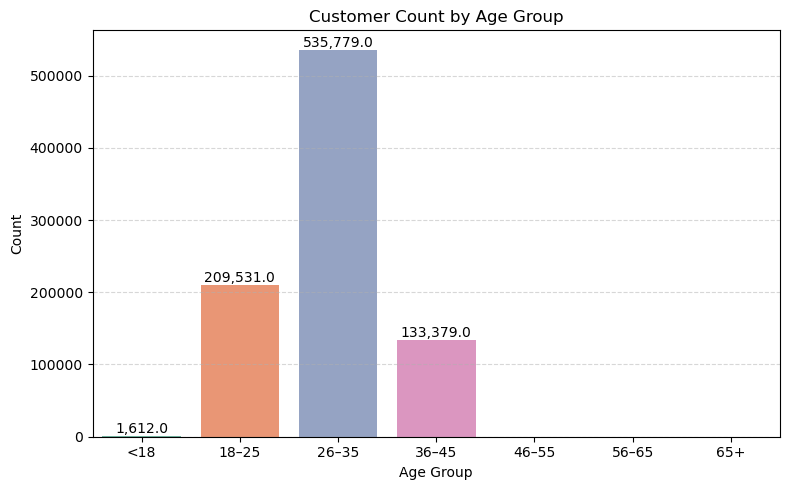

In [98]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='AgeGroup', order=age_labels, palette='Set2')
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


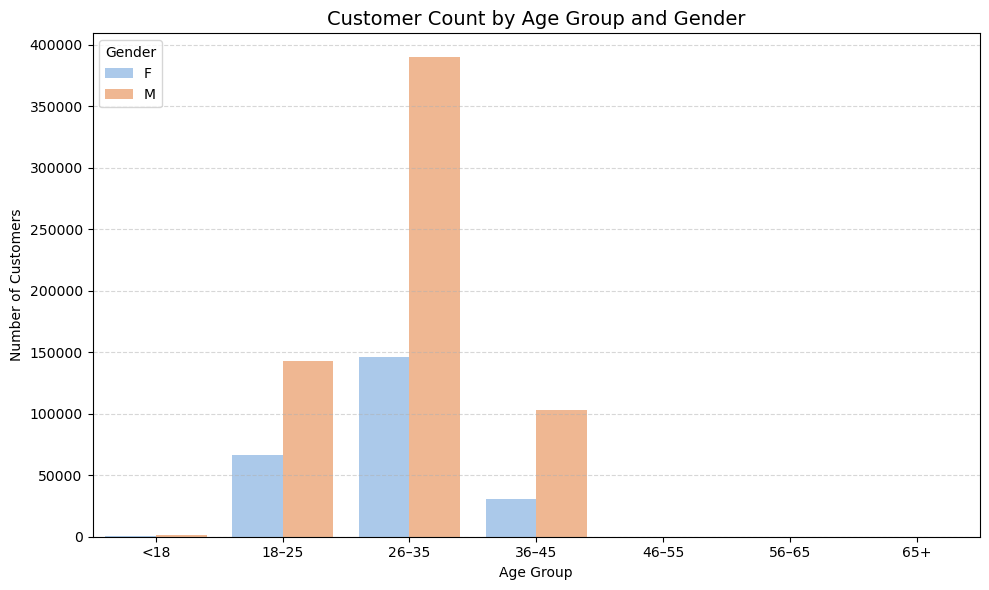

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AgeGroup', hue='CustGender', order=['<18', '18–25', '26–35', '36–45', '46–55', '56–65', '65+'], palette='pastel')

plt.title('Customer Count by Age Group and Gender', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Customer Transactions

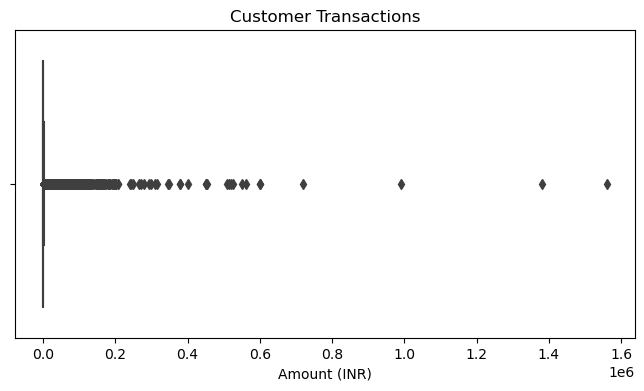

In [100]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['TransactionAmount (INR)'])
plt.title('Customer Transactions')
plt.xlabel('Amount (INR)')
plt.show()

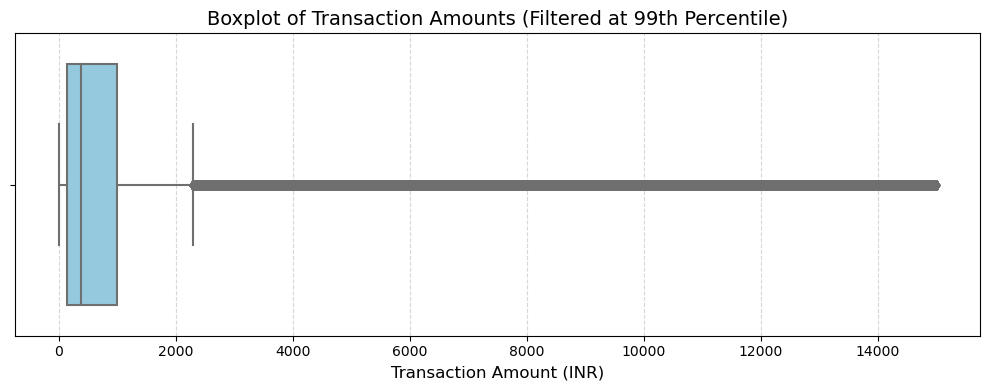

In [101]:
plt.figure(figsize=(10, 4))

# Filter extreme outliers for better visibility
filtered_data = data[data['TransactionAmount (INR)'] < data['TransactionAmount (INR)'].quantile(0.99)]

sns.boxplot(x=filtered_data['TransactionAmount (INR)'], color='skyblue')

plt.title('Boxplot of Transaction Amounts (Filtered at 99th Percentile)', fontsize=14)
plt.xlabel('Transaction Amount (INR)', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Customer Transaction Volume

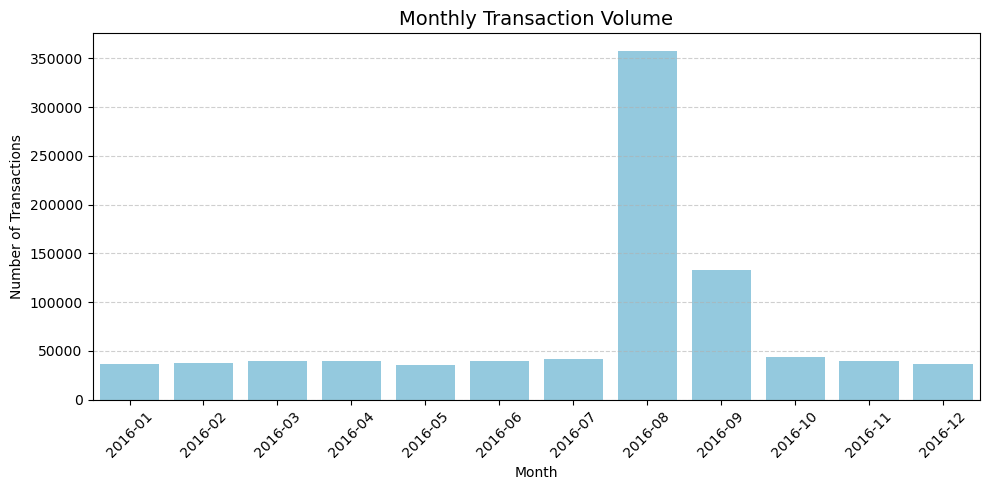

In [102]:
# monthly transaction volume

# Group by month
monthly_summary = data.groupby(data['TransactionDate'].dt.to_period('M')).agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalAmount=('TransactionAmount (INR)', 'sum')
).reset_index()

plt.figure(figsize = (10, 5))
sns.barplot(data = monthly_summary, x ='TransactionDate', y = 'TotalTransactions', color = 'skyblue')

plt.title('Monthly Transaction Volume', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 45)
plt.grid(True, axis ='y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

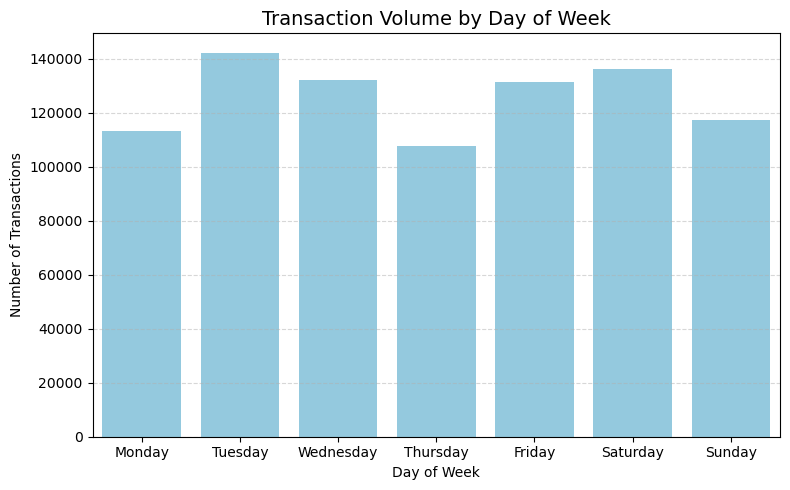

In [103]:
# Transaction volume by weekday
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='DayOfWeek', 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            color='skyblue')
plt.title('Transaction Volume by Day of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


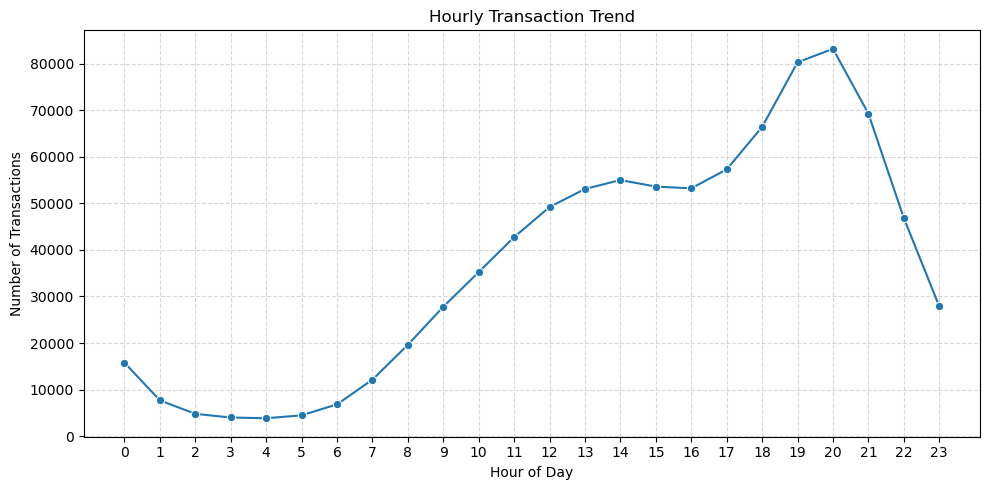

In [104]:
# Hourly transaction trend

# Extract hour from TransactionTime
data['TransactionHour'] = data['TransactionTime'].astype(str).str.zfill(6).str[:2].astype(int)

hourly_counts = data['TransactionHour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Hourly Transaction Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Transactions by Location 

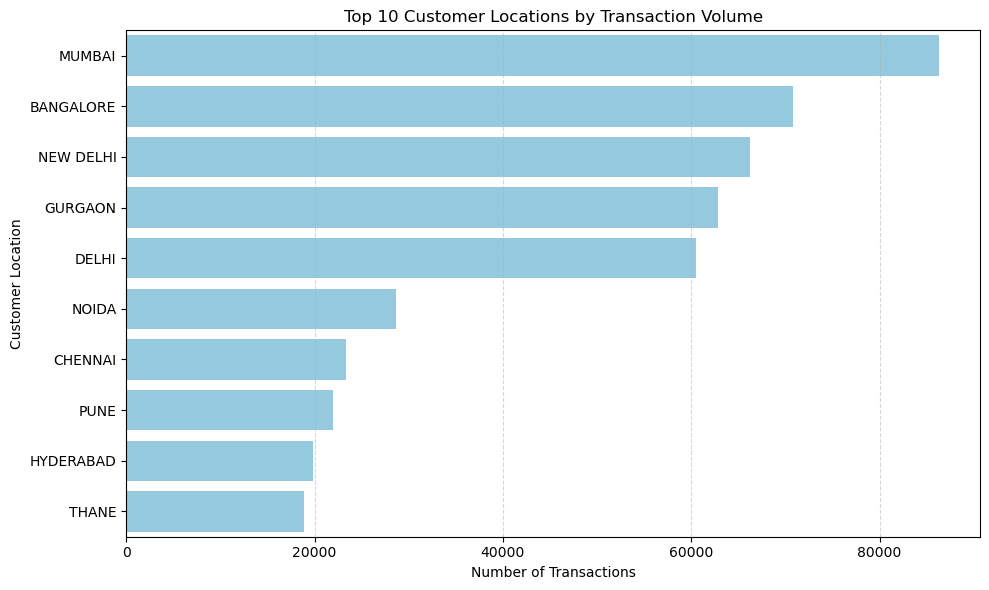

In [105]:
top_locations = data['CustLocation'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, color='skyblue')
plt.title('Top 10 Customer Locations by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Location')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


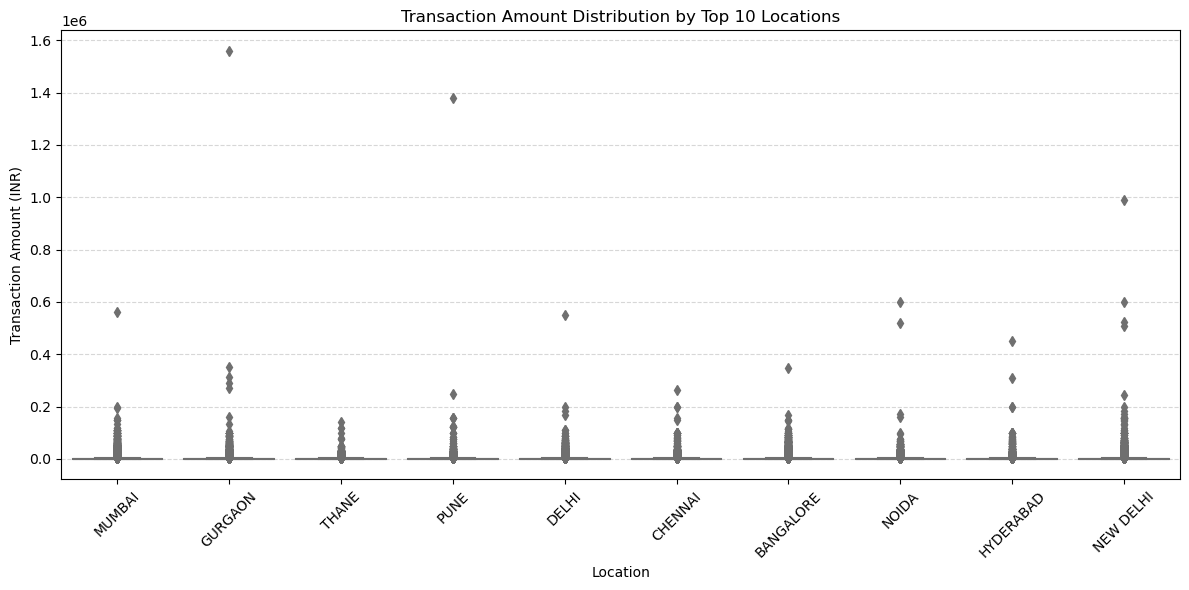

In [106]:
top_locs = data['CustLocation'].value_counts().nlargest(10).index
filtered = data[data['CustLocation'].isin(top_locs)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='CustLocation', y='TransactionAmount (INR)', palette='pastel')
plt.title('Transaction Amount Distribution by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Feature Engineering

In [107]:
# Calculate RFM metrics grouped by customerID

reference_date = data['TransactionDate'].max() + pd.Timedelta(days=1)

# Grouping
rfm = data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                   # Frequency
    'TransactionAmount (INR)': 'sum'                            # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head(10))

  CustomerID  Recency  Frequency  Monetary
0   C1010011       75          2    5106.0
1   C1010012      118          1    1499.0
2   C1010014      155          2    1455.0
3   C1010018       86          1      30.0
4   C1010028      103          1     557.0
5   C1010031      246          2    1864.0
6   C1010035      105          2     750.0
7   C1010036      106          1     208.0
8   C1010037       93          1   19680.0
9   C1010038      154          1     100.0


In [108]:
print(rfm.sort_values(by='Monetary', ascending=False).head(10))     # Top spenders
print(rfm.sort_values(by='Recency').head(10))                       # Most recent activity


       CustomerID  Recency  Frequency    Monetary
594456   C7319271      114          1  1560034.99
534984   C6677159      110          1  1380002.88
298912   C4141768      109          1   991132.22
80119    C1830891      277          1   720001.16
524772   C6549785       92          1   600008.32
382174   C5036642      246          1   600003.45
41095    C1425138      216          1   561001.00
239470   C3528755       88          4   550972.34
10739    C1115779       32          1   525003.83
467110   C5938826        2          1   520009.87
       CustomerID  Recency  Frequency  Monetary
259234   C3732591        1          2    2208.0
187334   C2984346        1          1     369.0
53484    C1537146        1          2    3240.0
523023   C6536412        1          1    1695.0
288289   C4036148        1          1     259.0
288301   C4036219        1          1     655.0
288313   C4036263        1          1     300.0
686082   C8292826        1          1    3180.0
187272   C2982287 

In [109]:
# Group customers by identical RFM combinations
rfm_counts = rfm.groupby(['Recency', 'Frequency', 'Monetary']).size().reset_index(name='CustomerCount')


In [110]:
# Sorted customer profiles

rfm_counts_sorted = rfm_counts.sort_values(by='CustomerCount', ascending=False)
rfm_counts_sorted.head(10).reset_index(drop=True)


,Recency,Frequency,Monetary,CustomerCount
0,154,1,100.0,572
1,93,1,100.0,545
2,116,1,100.0,540
3,2,1,100.0,540
4,336,1,200.0,526
5,87,1,100.0,526
6,92,1,100.0,525
7,93,1,200.0,520
8,124,1,100.0,518
9,336,1,100.0,516


## RFM Scoring / Customer Segmentation

In [111]:
# Compute RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])


In [112]:
# Calculate RFM Total Score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


In [113]:
# Define detailed rule-based segment

def assign_rule_segment(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r == 4 and f == 4 and m == 4:
        return 'Champions'
    elif r >= 3 and f >= 3:
        return 'Loyal Customers'
    elif r == 4 and f <= 2:
        return 'Recent Buyers'
    elif r <= 2 and f >= 3:
        return 'At Risk'
    elif f == 1 and m == 1:
        return 'Hibernating'
    else:
        return 'Others'

rfm['RuleSegment'] = rfm.apply(assign_rule_segment, axis=1)


In [114]:
# Define simple score based segment

def assign_score_segment(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 6:
        return 'Loyal Customers'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Churned'

rfm['ScoreSegment'] = rfm['RFM_Score'].apply(assign_score_segment)


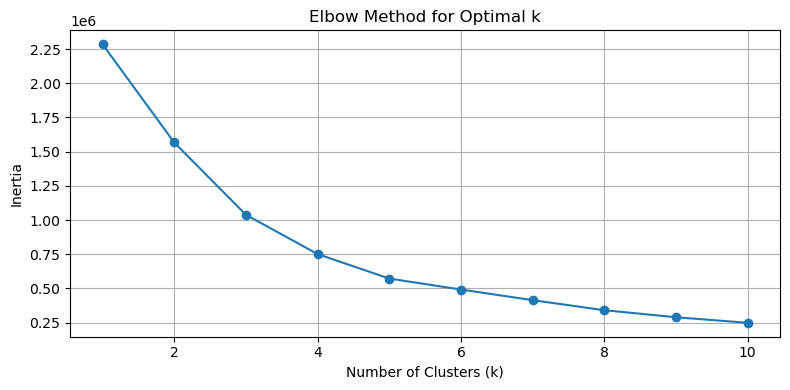

In [115]:
# Elbow Method to Determine Optimal k
scaler = StandardScaler()
rfm_scaled_for_elbow = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, algorithm='elkan')
    kmeans.fit(rfm_scaled_for_elbow)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [116]:
# Scale RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [117]:
# cluster summary

cluster_summary = rfm.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'CustomerCount'}).reset_index()

print(cluster_summary)


   Cluster     Recency  Frequency      Monetary  CustomerCount
0        0   94.700186   1.000000   1067.724710         483946
1        1   90.550445   2.120467   2306.883161         104510
2        2  260.034462   1.003753   1155.087089         170798
3        3  123.055468   1.300551  64315.111692           2542


In [118]:
rfm['RuleSegment'].value_counts()

Others             253290
Loyal Customers    186224
At Risk            169137
Recent Buyers       86109
Hibernating         41499
Champions           25537
Name: RuleSegment, dtype: int64

In [119]:
rfm['ScoreSegment'].value_counts()

Loyal Customers    383765
Best Customers     245762
At Risk            119123
Churned             13146
Name: ScoreSegment, dtype: int64

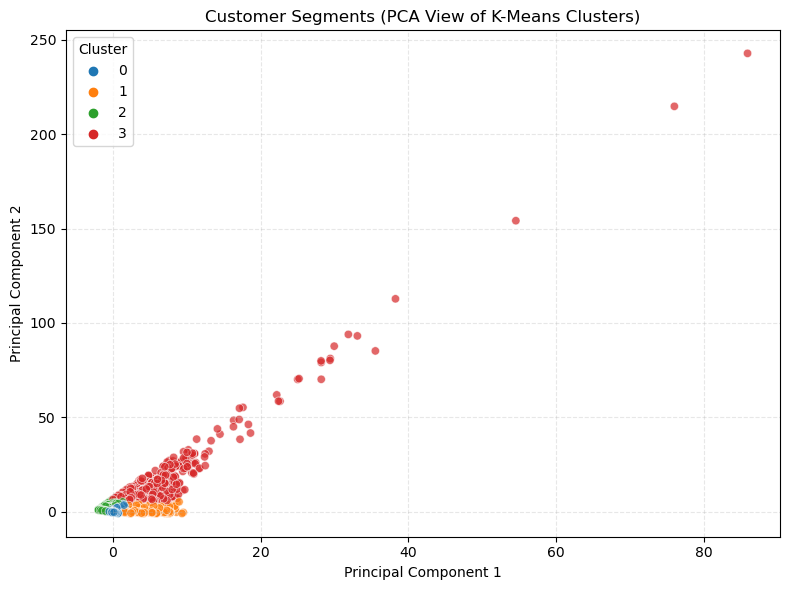

In [120]:
# PCA for visualisation

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title('Customer Segments (PCA View of K-Means Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

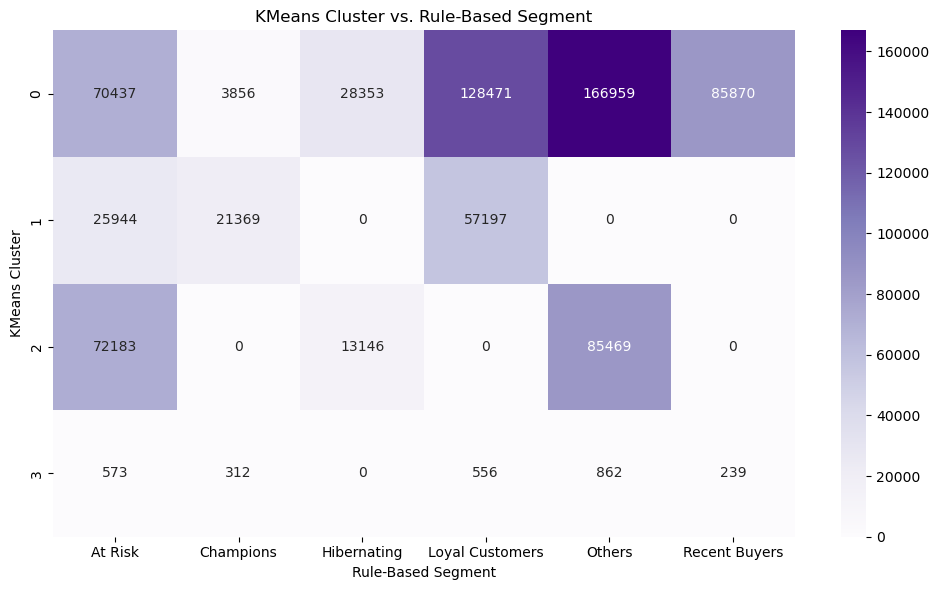

In [121]:
# Cross-tabulation between rule-based segments and KMeans cluster 
crosstab_cluster_rule = pd.crosstab(rfm['Cluster'], rfm['RuleSegment'])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_cluster_rule, annot=True, fmt='d', cmap='Purples')
plt.title('KMeans Cluster vs. Rule-Based Segment')
plt.xlabel('Rule-Based Segment')
plt.ylabel('KMeans Cluster')
plt.tight_layout()
plt.show()


In [122]:
# label mapping
cluster_labels = {
    0: 'Churned',
    1: 'Loyal Customers',
    2: 'At Risk',
    3: 'Best Customers'
}
rfm['ClusterLabel'] = rfm['Cluster'].map(cluster_labels)

# cluster profile with labels
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_profile['CustomerCount'] = rfm['Cluster'].value_counts().sort_index()
cluster_profile['Label'] = cluster_profile.index.map(cluster_labels)

# Reorder columns
cluster_profile = cluster_profile[['Label', 'Recency', 'Frequency', 'Monetary', 'CustomerCount']].reset_index()

print(cluster_profile)


   Cluster            Label  Recency  Frequency  Monetary  CustomerCount
0        0          Churned    94.70       1.00   1067.72         483946
1        1  Loyal Customers    90.55       2.12   2306.88         104510
2        2          At Risk   260.03       1.00   1155.09         170798
3        3   Best Customers   123.06       1.30  64315.11           2542


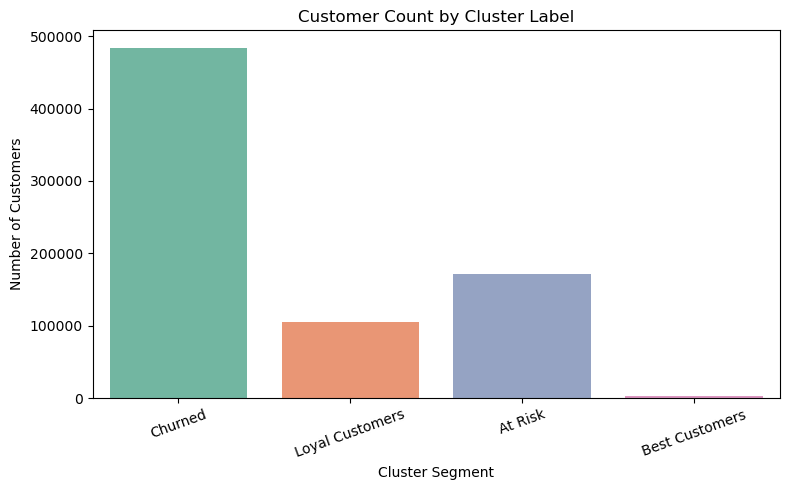

In [123]:

plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_profile, x='Label', y='CustomerCount', palette='Set2')
plt.title('Customer Count by Cluster Label')
plt.xlabel('Cluster Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


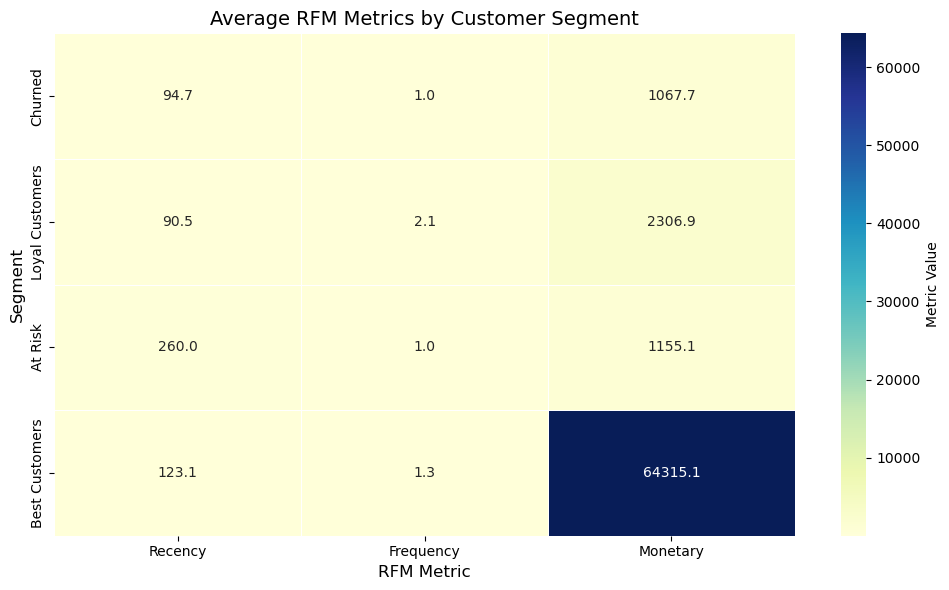

In [124]:

# Prepare metrics for heatmap
metrics = cluster_profile.set_index('Label')[['Recency', 'Frequency', 'Monetary']]

plt.figure(figsize=(10, 6))
sns.heatmap(metrics, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Metric Value'})

plt.title('Average RFM Metrics by Customer Segment', fontsize=14)
plt.xlabel('RFM Metric', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


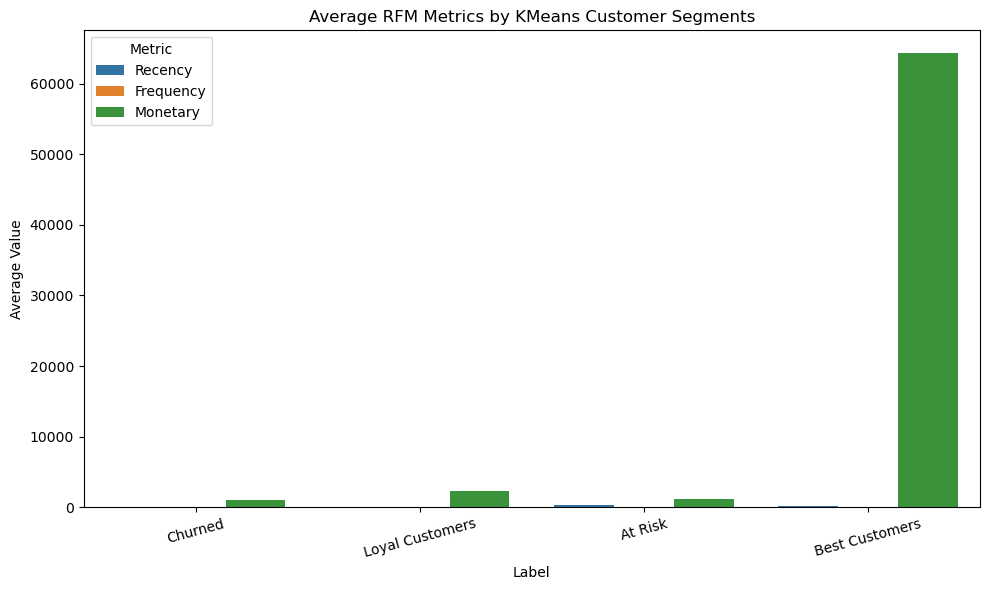

In [125]:
melted = cluster_profile.melt(id_vars='Label', 
                              value_vars=['Recency', 'Frequency', 'Monetary'], 
                              var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Label', y='Value', hue='Metric')
plt.title('Average RFM Metrics by KMeans Customer Segments')
plt.ylabel('Average Value')
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


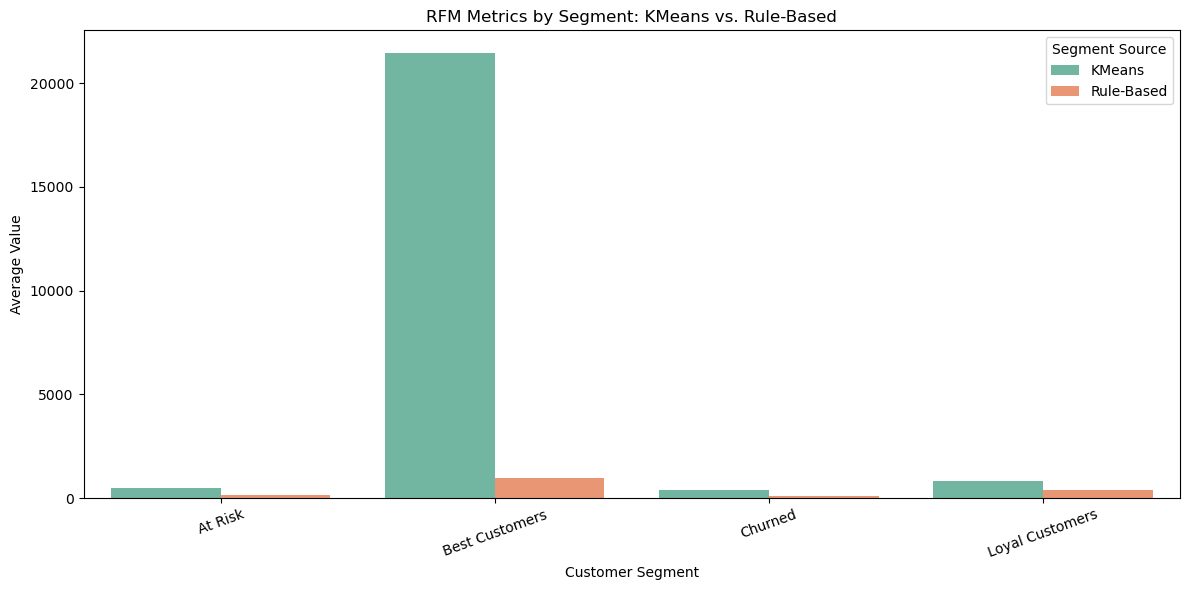

In [126]:
# KMeans cluster profile
kmeans_profile = rfm.groupby('ClusterLabel')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
kmeans_profile['SegmentType'] = 'KMeans'
kmeans_profile = kmeans_profile.reset_index().rename(columns={'ClusterLabel': 'Segment'})

# Rule-based profile
rule_profile = rfm.groupby('ScoreSegment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
rule_profile['SegmentType'] = 'Rule-Based'
rule_profile = rule_profile.reset_index().rename(columns={'ScoreSegment': 'Segment'})

# Combine
combined = pd.concat([kmeans_profile, rule_profile], axis=0)

# Melt for plotting
melted = combined.melt(id_vars=['Segment', 'SegmentType'], 
                       value_vars=['Recency', 'Frequency', 'Monetary'], 
                       var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Segment', y='Value', hue='SegmentType', ci=None, palette='Set2', 
            dodge=True)
plt.title('RFM Metrics by Segment: KMeans vs. Rule-Based')
plt.ylabel('Average Value')
plt.xlabel('Customer Segment')
plt.xticks(rotation=20)
plt.legend(title='Segment Source')
plt.tight_layout()
plt.show()


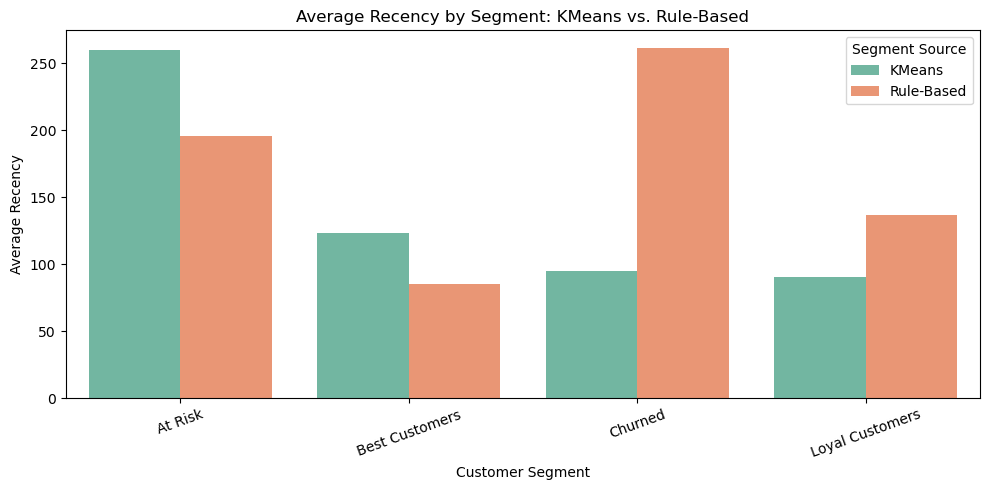

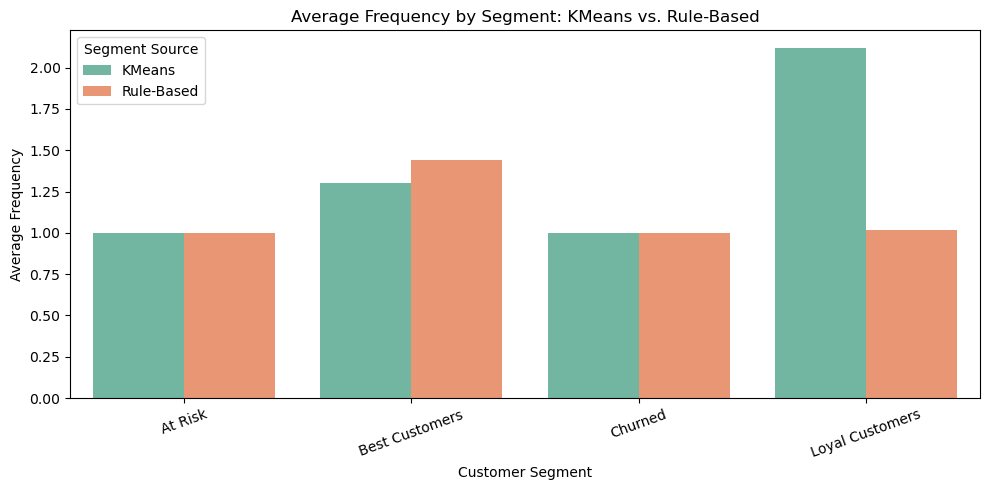

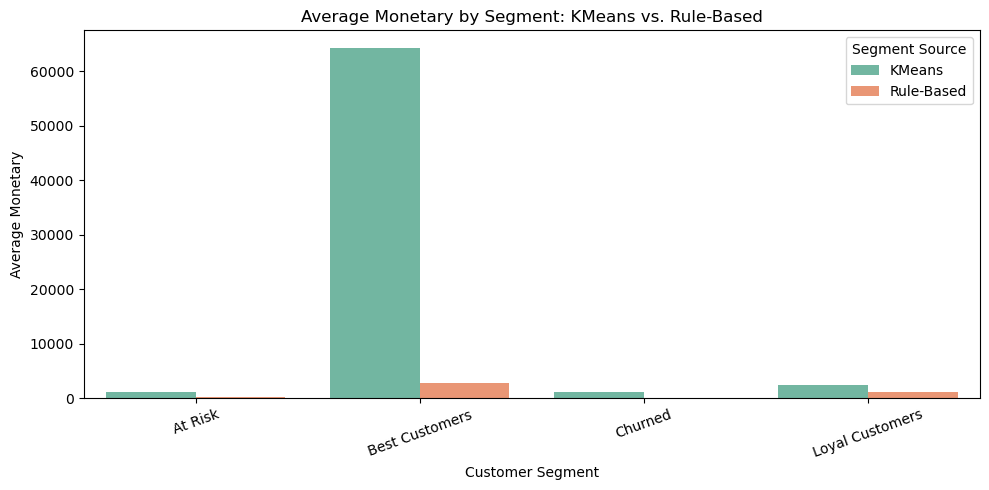

In [127]:

# 'melted' contains Segment, SegmentType, Metric, Value

# Loop through each RFM metric
metrics = ['Recency', 'Frequency', 'Monetary']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=melted[melted['Metric'] == metric],
        x='Segment',
        y='Value',
        hue='SegmentType',
        palette='Set2'
    )
    plt.title(f'Average {metric} by Segment: KMeans vs. Rule-Based')
    plt.xlabel('Customer Segment')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=20)
    plt.legend(title='Segment Source')
    plt.tight_layout()
    plt.show()


In [128]:
# Save RFM and clustering results
rfm.to_csv('rfm_segments.csv', index=False)

In [129]:
# View all unique RFM-based segments
print(rfm['ScoreSegment'].unique())

['Best Customers' 'Loyal Customers' 'At Risk' 'Churned']


In [130]:
# Merge original customer metadata with RFM & cluster info
full_df = data.merge(
    rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 
         'ScoreSegment', 'RuleSegment', 'Cluster', 'ClusterLabel']],
    on='CustomerID',
    how='left'
)

# Drop duplicates if CustomerID had multiple rows
full_df = full_df.drop_duplicates(subset='CustomerID')

# Save the enriched dataset
import os

# Create 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)
full_df.to_csv('data/rfm_segments.csv', index=False)
print("rfm_segments.csv saved with full demographic and RFM info.")


rfm_segments.csv saved with full demographic and RFM info.


In [131]:
print(full_df.columns.tolist())

['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'TransactionDateOnly', 'CustomerAge', 'AgeGroup', 'DayOfWeek', 'TransactionHour', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'ScoreSegment', 'RuleSegment', 'Cluster', 'ClusterLabel']


In [135]:
# Remove unused columns
cols_to_keep = [
    'CustomerID', 'Recency', 'Frequency', 'Monetary',
    'RFM_Score', 'ScoreSegment', 'RuleSegment',
    'Cluster', 'ClusterLabel',
    'CustGender', 'CustLocation', 'AgeGroup',
    'TransactionDate', 'TransactionID', 'CustAccountBalance'
]

small_df = full_df[cols_to_keep].drop_duplicates(subset='CustomerID')

# Save the lighter version
small_df.to_csv("data/rfm_segments.csv", index=False)
print("File saved! New shape:", small_df.shape)


File saved! New shape: (761796, 15)


In [136]:

print("Size (MB):", round(os.path.getsize("data/rfm_segments.csv") / (1024 * 1024), 2))

Size (MB): 77.36


In [137]:
print(small_df.columns.tolist())

['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'ScoreSegment', 'RuleSegment', 'Cluster', 'ClusterLabel', 'CustGender', 'CustLocation', 'AgeGroup', 'TransactionDate', 'TransactionID', 'CustAccountBalance']
